In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd /content/drive/'My Drive'/yolov4
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

/content/drive/My Drive/yolov4
Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (444/444), 34.09 MiB | 24.99 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
%cd /content/drive/'My Drive'/yolov4/OIDv4_ToolKit
!python main.py downloader --classes 'Vehicle registration plate' --type_csv train --limit 1500

/content/drive/My Drive/yolov4/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Vehicle registration plate.

Vehicle registration plate
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 5368 online images for train.


In [ ]:
%cd /content/drive/'My Drive'/yolov4/OIDv4_ToolKit

/content/drive/My Drive/yolov4/OIDv4_ToolKit


In [ ]:
!python main.py downloader --classes 'Vehicle registration plate' --type_csv validation --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Vehicle registration plate.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...100%, 16 MB, 45806 KB/s, 0 seconds pass

In [ ]:
%cd /content/drive/'My Drive'/yolov4/OIDv4_ToolKit
!python convert_annotations.py

/content/drive/My Drive/yolov4/OIDv4_ToolKit
22222222
/content/drive/My Drive/yolov4/OIDv4_ToolKit/OID/Dataset/validation
Currently in subdirectory: validation
Here :  ['Vehicle registration plate']
Converting annotations for class:  Vehicle registration plate
100% 300/300 [00:09<00:00, 31.45it/s]
22222222
/content/drive/My Drive/yolov4/OIDv4_ToolKit/OID/Dataset/train
Currently in subdirectory: train
Here :  ['Vehicle registration plate']
Converting annotations for class:  Vehicle registration plate
100% 1500/1500 [00:48<00:00, 30.69it/s]


In [ ]:
#make a folder of yolov4 in your google drive
# download darknet repo
%cd /content/drive/My Drive/yolov4
!git clone https://github.com/AlexeyAB/darknet


In [ ]:
#cahnge directory to darknett
%cd /content/drive/My Drive/yolov4/darknet

/content/drive/My Drive/yolov4/darknet


In [ ]:
#change makefile to have GPU and OPENCV enabled
#%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [ ]:
!cp /content/drive/'My Drive'/yolov4/darknet/generate_train.py /content/drive/'My Drive'/yolov4/darknet/data/traindata

In [ ]:
%cd /content/drive/'My Drive'/yolov4/darknet/data/traindata
!python generate_train.py

/content/drive/My Drive/yolov4/darknet/data/traindata


In [ ]:
!cp /content/drive/'My Drive'/yolov4/darknet/data/traindata/tain.txt /content/drive/'My Drive'/yolov4/darknet/data

cp: cannot stat '/content/drive/My Drive/yolov4/darknet/data/traindata/tain.txt': No such file or directory


In [ ]:
for item in os.listdir('/content/drive/My Drive/yolov4/darknet/data/traindata'):
  if(item == 'generate_train.py'):
    os.remove('/content/drive/My Drive/yolov4/darknet/data/traindata/generate_train.py')

In [ ]:
%cd /content/drive/'My Drive'/yolov4/darknet/
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

[Errno 2] No such file or directory: '/content/drive/My Drive/yolov4/darknet/'
/content


In [ ]:
!./darknet detector train data/obj.data cfg/yolov4_custom_lpr.cfg yolov4.conv.137 -dont_show 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov4_custom_lpr
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 2, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show
!./darknet detector train data/obj.data cfg/yolov4_custom_lpr.cfg backup/LRP/yolov4_custom_lpr_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000035, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.001734, iou_loss = 0.000000, total_loss = 0.001734 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.771733, GIOU: 0.767717), Class: 0.998782, Obj: 0.822389, No Obj: 0.000281, .5R: 1.000000, .75R: 0.666667, count: 3, class_loss = 0.205368, iou_loss = 0.178664, total_loss = 0.384033 
 total_bbox = 114112, rewritten_bbox = 0.153358 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.845974, GIOU: 0.840851), Class: 0.999406, Obj: 0.838482, No Obj: 0.001700, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.014584, iou_loss = 0.023075, total_loss = 0.037659 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj:

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_custom_lpr.cfg backup/LRP/yolov4_custom_lpr_final.weights /content/drive/'My Drive'/yolov4/darknet/data/test2.jpg -thresh 0.3


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

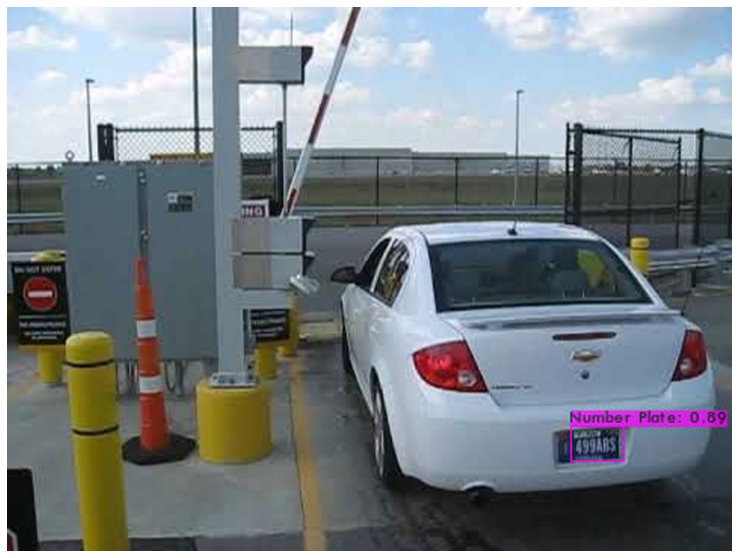

In [ ]:
imShow('predictions.jpg')

In [ ]:
%cd /content/drive/'My Drive'
!git clone https://github.com/theAIGuysCode/tensorflow-yolov4-tflite.git

/content/drive/My Drive
Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 907, done.
remote: Total 907 (delta 0), reused 0 (delta 0), pack-reused 907
Receiving objects: 100% (907/907), 211.45 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (438/438), done.
Checking out files: 100% (133/133), done.


In [ ]:
%cd /content/drive/'My Drive'
!git clone https://github.com/theAIGuysCode/yolov4-custom-functions.git

/content/drive/My Drive
Cloning into 'yolov4-custom-functions'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 241 (delta 58), reused 39 (delta 13), pack-reused 122
Receiving objects: 100% (241/241), 62.01 MiB | 16.48 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Checking out files: 100% (64/64), done.


In [ ]:
!pip install pytesseract
%cd /content/drive/'My Drive'/yolo_runner
#!python save_model.py --weights ./data/custom.weights --output /content/drive/'My Drive'/yolo_runner/data --input_size 416 --model yolov4 
#!python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov4 --images ./data/images/car.jpg

/content/drive/My Drive/yolo_runner


In [ ]:
!python detect.py --weights /content/drive/'My Drive'/yolo_runner/data --size 416 --model yolov4 --images /content/drive/'My Drive'/test4.jpg --crop --info

Object found: Number_Plate, Confidence: 0.93, BBox Coords (xmin, ymin, xmax, ymax): 386.0, 349.0, 549.0, 399.0 


In [ ]:
!python detect.py --weights /content/drive/'My Drive'/yolo_runner/data --size 416 --model yolov4 --images /content/drive/'My Drive'/test2.jpg --info 

Object found: Number_Plate, Confidence: 0.59, BBox Coords (xmin, ymin, xmax, ymax): 366.0, 278.0, 404.0, 304.0 


In [ ]:
%cd /content/drive/'My Drive'/yolo_runner
!python detect_video.py --weights /content/drive/'My Drive'/yolo_runner/data --size 416 --model yolov4 --video /content/drive/'My Drive'/vid.mp4 --output ./detections/results_vid.avi -dont_show

/content/drive/My Drive/yolo_runner
FPS: 0.30
FPS: 28.05
FPS: 28.17
FPS: 28.52
FPS: 28.23
FPS: 25.59
FPS: 28.00
FPS: 28.03
FPS: 28.02
FPS: 28.33
FPS: 28.14
FPS: 28.66
FPS: 27.21
FPS: 28.36
FPS: 28.19
FPS: 25.90
FPS: 28.25
FPS: 28.81
FPS: 28.52
FPS: 28.58
FPS: 27.78
FPS: 28.09
FPS: 28.66
FPS: 28.60
FPS: 28.06
FPS: 28.72
FPS: 28.07
FPS: 28.71
FPS: 27.81
FPS: 28.00
FPS: 28.22
FPS: 26.94
FPS: 28.66
FPS: 27.94
FPS: 28.54
FPS: 27.50
FPS: 28.35
FPS: 28.87
FPS: 27.74
FPS: 28.55
FPS: 28.06
FPS: 28.64
FPS: 27.54
FPS: 28.31
FPS: 28.24
FPS: 27.95
FPS: 27.55
FPS: 28.50
FPS: 28.72
FPS: 27.96
FPS: 28.77
FPS: 28.22
FPS: 28.85
FPS: 25.26
FPS: 28.70
FPS: 27.83
FPS: 28.38
FPS: 28.51
FPS: 27.97
FPS: 28.32
FPS: 28.67
FPS: 28.20
FPS: 28.69
FPS: 27.91
FPS: 28.52
FPS: 27.89
FPS: 28.62
FPS: 28.55
FPS: 28.29
FPS: 28.58
FPS: 28.34
FPS: 27.06
FPS: 28.44
FPS: 28.19
FPS: 28.55
FPS: 27.03
FPS: 28.61
FPS: 28.46
FPS: 27.61
FPS: 28.28
FPS: 28.04
FPS: 28.38
FPS: 28.40
FPS: 28.40
FPS: 28.46
FPS: 28.35
FPS: 28.44
FPS: 27.